In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts

df = ts.get_hist_data("601058").sort_values(by="date",ascending=True)
df.index = pd.to_datetime(df.index)
df



本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2021-08-02,9.17,9.50,9.45,9.06,246290.48,0.32,3.50,9.450,9.450,9.450,246290.48,246290.48,246290.48,0.96
2021-08-03,9.40,9.59,9.36,9.25,239638.19,-0.09,-0.95,9.405,9.405,9.405,242964.34,242964.34,242964.34,0.94
2021-08-04,9.37,9.48,9.37,9.35,158264.12,0.01,0.11,9.393,9.393,9.393,214730.93,214730.93,214730.93,0.62
2021-08-05,9.30,9.36,9.23,9.10,171792.05,-0.14,-1.49,9.353,9.353,9.353,203996.21,203996.21,203996.21,0.67
2021-08-06,9.24,9.29,9.18,9.11,108390.63,-0.05,-0.54,9.318,9.318,9.318,184875.09,184875.09,184875.09,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,11.45,11.49,11.33,10.99,513800.00,-0.27,-2.33,11.474,11.783,11.725,324790.30,266656.72,226231.68,1.64
2024-01-26,11.26,11.39,11.23,11.06,373213.06,-0.10,-0.88,11.382,11.694,11.706,343308.75,284443.78,236022.68,1.19
2024-01-29,11.25,11.53,11.32,11.19,394419.97,0.09,0.80,11.402,11.617,11.684,366652.62,309678.02,246862.54,1.26


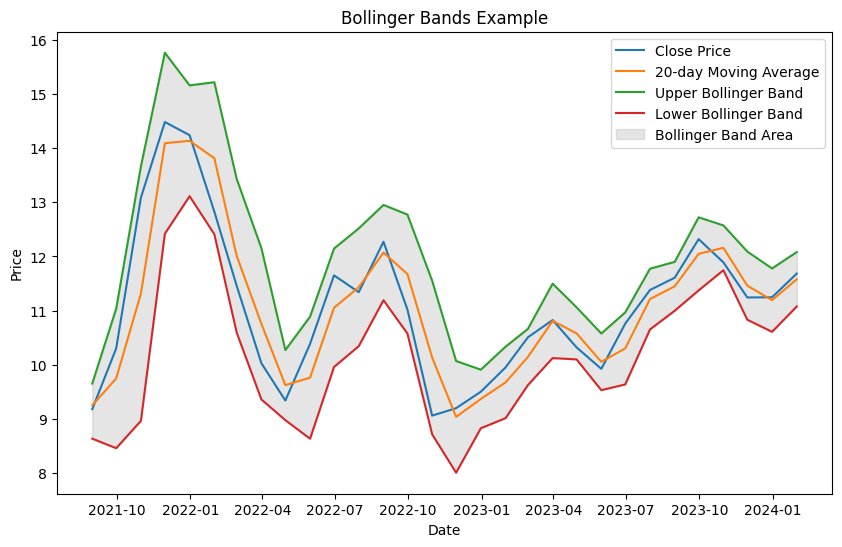

In [9]:
# REF: https://www.investopedia.com/terms/b/bollingerbands.asp
# 计算均值和标准差
df['upper'] = df['ma20'] + 2 * df['close'].rolling(window=20).std()
df['lower'] = df['ma20'] - 2 * df['close'].rolling(window=20).std()

df = df.resample("M").mean()

# 绘制布林带
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='Close Price')
plt.plot(df.index, df['ma20'], label='20-day Moving Average')
plt.plot(df.index, df['upper'], label='Upper Bollinger Band')
plt.plot(df.index, df['lower'], label='Lower Bollinger Band')

# 填充布林带区域
plt.fill_between(
    df.index, 
    df['upper'], 
    df['lower'], 
    color='gray', 
    alpha=0.2, 
    label='Bollinger Band Area'
)

# 添加标题和标签
plt.title('Bollinger Bands Example')
plt.xlabel('Date')
plt.ylabel('Price')

# 添加图例
plt.legend()

# 显示图表
plt.show()